# Outlier and KNN

**Outlier** adalah data yang memiliki nilai yang jauh berbeda dari sebagian besar data lainnya dalam sebuah dataset, yang dapat disebabkan oleh kesalahan pengukuran, variasi alami, atau faktor eksternal lainnya. Identifikasi outlier penting dalam analisis data karena dapat memengaruhi hasil _pemodelan_ dan _pengambilan keputusan_. Sementara itu, **K-Nearest Neighbors (KNN)** adalah algoritma pembelajaran mesin berbasis instance yang digunakan untuk klasifikasi dan regresi dengan menentukan kelas atau nilai suatu data berdasarkan mayoritas dari k tetangga terdekatnya. KNN sangat bergantung pada metrik jarak, seperti **Euclidean Distance**.

## Outlier Detection
Outlier adalah titik data yang berbeda secara signifikan dari sebagian besar data. Faktor penyebab:

- **Data entry errors**: Nilai yang dicatat salah.
- **Measurement errors**: Sensor atau instrumen rusak.
- **Natural variability**: Pengamatan yang ekstrim namun valid (pendapatan seorang miliarder dalam kumpulan data pendapatan rata-rata).

### Why is it Important?
- Outliers dapat mendistorsi analisis statistik (mean, deviasi standar).
- Hal ini dapat berdampak negatif terhadap performa model pembelajaran mesin.
- Dalam beberapa kasus, outlier mungkin mewakili informasi penting (deteksi penipuan).

### Methods for Outlier Detection
1. **Statistical Methods**:
   - _Z-Score_: Mengukur berapa banyak standar deviasi suatu titik data dari mean. Titik data dengan skor Z lebih besar dari 3 atau kurang dari -3 sering kali dianggap outlier.
   - _IQR (Interquartile Range)_: Mengidentifikasi outlier sebagai titik data di bawah Q1 - 1,5IQR atau di atas Q3 + 1,5IQR, dengan Q1 dan Q3 masing-masing adalah kuartil pertama dan ketiga.
2. **Visual Methods**:
   - _Box Plots_: Representasi grafis dari distribusi data (ditampilkan sebagai titik di luar "whiskers").
   - _Scatter Plots_: Berguna untuk mengidentifikasi outlier dalam data bivariat (dua variabel).
3. **Machine Learning Methods**:
   - _Clustering_: Outliers mungkin muncul sebagai titik data yang bukan milik cluster mana pun.
   - _Isolation Forest_: Algoritm dirancang khusus agar mendeteksi outlier dengan mengisolasi titik data.
   - _DBSCAN (Density-Based Spatial Clustering of Applications with Noise)_: Mengidentifikasi outlier sebagai titik di wilayah dengan kepadatan rendah.
   - **KNN (K-Nearest Neighbors)**: Menggunakan jarak ke tetangga terdekat untuk mengidentifikasi outlier.
4. **Domain-Specific Methods**:
   - Gunakan pengetahuan domain untuk mengidentifikasi outlier. Misalnya, dalam layanan kesehatan, usia pasien 150 tahun merupakan hal yang berbeda.

### Handling Outliers
Setelah outlier terdeteksi, Anda perlu memutuskan cara menanganinya:

- **Remove**: Jika outlier disebabkan oleh kesalahan atau **noise**.
- **Transform**: Menerapkan transformasi (transformasi log) untuk mengurangi dampak outlier.
- **Cap/Floor**: Ganti outlier dengan nilai ambang batas maksimum atau minimum.
- **Keep**: Jika outlier tersebut valid dan bermakna (kasus penipuan).

### Summary of Outlier Detection
- Outlier adalah titik data yang menyimpang secara signifikan dari data lainnya.
- Mendeteksi dan menangani outlier sangat penting untuk memastikan kualitas data.
- Metode untuk mendeteksi outlier mencakup teknik statistik (Z-score, IQR), metode visual (box plots, scatter plots), dan algoritma pembelajaran mesin (Isolation Forest, DBSCAN).
- Outlier dievaluasi secara hati-hati untuk menentukan apakah itu kesalahan atau pengamatan yang bermakna.

## K-Nearest Neighbors (KNN)
KNN mengidentifikasi outlier dengan menghitung jarak suatu titik ke K tetangga terdekatnya. Titik dengan rata-rata/total jarak signifikan lebih besar dianggap outlier, karena berada di area kepadatan rendah.

Parameter Krusial:
1. Nilai K:
      - K terlalu kecil: Rentan noise (false positive).
      - K terlalu besar: Risiko melewatkan outlier (false negative).
2. Metrik Jarak: _Euclidean_ (skala seragam) atau _Manhattan_ (robust terhadap outlier).
3. Normalisasi: Wajib untuk data berskala berbeda (e.g., Z-score).

Perkembangan KNN:
   * _Local Outlier Factor (LOF)_: Memperhitungkan kepadatan lokal, lebih akurat untuk anomali kompleks.
   * Kelebihan: Sederhana, intuitif, dan efektif untuk identifikasi data tidak konsisten.


### How KNN Works?
1. **Step 1: Choose a Value for K**
   - Pilih jumlah tetangga (K) yang akan dipertimbangkan. Misalnya, K=3 berarti algoritma akan melihat 3 tetangga terdekat untuk setiap titik data.
2. **Step 2: Calculate Distances**
   - Hitung jarak (**Euclidean distance**, Manhattan distance, dan Minkowski distance) antara setiap titik data dan K tetangga terdekatnya.
3. **Step 3: Identify Outliers**
   - Titik data dengan jarak yang lebih jauh ke tetangganya dianggap outlier. Misalnya, jika jarak rata-rata ke K tetangga terdekat jauh lebih besar dibandingkan sebagian besar data, maka titik tersebut ditandai sebagai outlier.

#### What is Euclidean Distance?
Euclidean distance adalah salah satu metrik jarak yang paling umum digunakan dalam ilmu data dan pembelajaran mesin. Ini mengukur jarak garis lurus antara dua titik dalam ruang multidimensi. Ini berasal dari teorema Pythagoras dan digunakan secara luas karena kesederhanaan dan interpretasi intuitifnya.

#### Euclidean Distance Formula
Untuk dua titik \( x = (x_1, x_2, \dots, x_n) \) dan \( y = (y_1, y_2, \dots, y_n) \) dalam ruang \( n \)-dimensi:  
$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

#### Sample Case
Misalkan ada dua titik dalam ruang 2D:
- Titik A: \( (1, 2) \)  
- Titik B: \( (4, 6) \)  

**Langkah 1**: Hitung selisih tiap komponen:
$$
\begin{align*}
x_2 - x_1 &= 4 - 1 = 3 \\
y_2 - y_1 &= 6 - 2 = 4 \\
\end{align*}
$$

**Langkah 2**: Kuadratkan selisih:
$$
\begin{align*}
(3)^2 &= 9 \\
(4)^2 &= 16 \\
\end{align*}
$$

**Langkah 3**: Jumlahkan hasil kuadrat:
$$
9 + 16 = 25
$$

**Langkah 4**: Akar kuadratkan hasil penjumlahan:
$$
d(A, B) = \sqrt{25} = 5
$$

**Hasil**: Jarak Euclidean antara A dan B adalah **5 unit**.


## Installation Requirements

1. `pymysql`
   * Tujuan: Konektor database MySQL untuk Python.
   * Use Case: Sambungkan ke database MySQL, jalankan query SQL, dan ambil hasilnya.
2. `psycopg2-binary`
   * Tujuan: Adaptor database PostgreSQL untuk Python.
   * Use Case: Berinteraksi dengan database PostgreSQL.
3. `sqlalchemy`
   * Tujuan: Toolkit SQL dan pustaka Object-Relational Mapping (ORM).
   * Use Case:
      - Tulis kode database-agnostik (berfungsi dengan MySQL, PostgreSQL, SQLite, dll.).
      - Tentukan tabel dan hubungan menggunakan kelas Python.
      - Gunakan mesin SQLAlchemy untuk terhubung ke database (sering dipasangkan dengan pandas).
4. `pandas`
   * Tujuan: Perpustakaan manipulasi dan analisis data.
   * Use Case:
      - Memuat data dari database CSV/Excel/SQL ke objek DataFrame.
      - Bersihkan, ubah, dan analisis data terstruktur.
5. `python-dotenv`
   * Tujuan: Memuat variabel lingkungan dari file .env.
   * Use Case: Menyimpan kredensial database, kunci API, atau rahasia lainnya dengan aman.
6. `matplotlib`
   * Tujuan: Perpustakaan plot dan visualisasi.
   * Use Case: Membuat grafik (diagram garis, histogram, plot sebar) untuk menjelajahi dan menyajikan data.
7. `scikit-learn`
   * Tujuan: Pustaka machine learning untuk Python.
   * Use Case:
      - Menerapkan algoritma machine learning (klasifikasi, regresi, clustering, dll.).
      - Mengekstraksi fitur, melakukan validasi silang, dan evaluasi model.
      - Menggunakan pipeline untuk preprocessing dan pelatihan model.

### Why These Packages Together?
1. Terhubung ke database (MySQL/PostgreSQL) melalui pymysql/psycopg2.
2. Menggunakan sqlalchemy untuk interaksi database yang fleksibel.
3. Menggunakan pandas untuk manipulasi data.
4. Mengamankan kredensial dengan python-dotenv.
5. Memvisualisasikan hasil dengan matplotlib.
6. Menerapkan teknik machine learning dengan scikit-learn.

In [24]:
%pip install pymysql psycopg2-binary sqlalchemy pandas python-dotenv matplotlib scikit-learn

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

load_dotenv()

True

In [26]:
try:
  mysql_url = os.getenv("MYSQL_URL")
  postgres_url = os.getenv("POSTGRES_URL")
  mysql_engine = create_engine(mysql_url)
  postgres_engine = create_engine(postgres_url)
  df_mysql = pd.read_sql("SELECT * FROM iris_mysql",mysql_engine)
  df_postgres = pd.read_sql("SELECT * FROM iris_postgre ORDER BY id",postgres_engine)

  df_postgres = df_postgres.drop(columns=["class"])
  df_iris = df_mysql.merge(df_postgres, on="id")
  df_iris.to_csv("iris_combined.csv", index=False)
  print(df_iris)

except Exception as e:
  print(f"Error message: {e}")

finally:
  mysql_engine.dispose()
  postgres_engine.dispose()

      id           class  petal length  petal width  sepal length  sepal width
0      1     Iris-setosa          86.4         70.0          20.1         30.5
1      2     Iris-setosa           1.4          0.2           4.9          3.0
2      3     Iris-setosa           1.3          0.2           4.8          3.2
3      4     Iris-setosa           1.5          0.2           4.6          3.1
4      5     Iris-setosa           1.4          0.2           5.0          3.6
..   ...             ...           ...          ...           ...          ...
145  146  Iris-virginica           5.2          2.3           6.7          3.0
146  147  Iris-virginica           5.0          1.9           6.3          2.5
147  148  Iris-virginica           5.2          2.0           6.5          3.0
148  149  Iris-virginica           5.4          2.3           6.2          3.4
149  150  Iris-virginica           5.1          1.8           5.9          3.0

[150 rows x 6 columns]


## Preprocessing

In [27]:
# Drop kolom non-numerik
df_numeric = df_iris.drop(columns=['id', 'class'])

# Normalisasi data (krusial untuk KNN)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric) # Drop kolom non-numerik
df_numeric = df_iris.drop(columns=['id', 'class'])

# Normalisasi data (krusial untuk KNN)
df_scaled = scaler.fit_transform(df_numeric)

In [28]:
# Pilih K = 5 tetangga terdekat
k = 5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(df_scaled)

# Hitung jarak ke K tetangga terdekat
distances, indices = nbrs.kneighbors(df_scaled)

# Hitung anomaly score (rata-rata jarak ke K tetangga)
anomaly_scores = distances.mean(axis=1)

# Tentukan threshold outlier (misal: persentil 95)
threshold = np.percentile(anomaly_scores, 95)
outliers = df_iris[anomaly_scores > threshold]

In [29]:
# Untuk menghapus outlier
df_clean = df_iris[anomaly_scores <= threshold]

# Untuk menghapus permanen outlier
df_clean = df_clean.reset_index(drop=True)
df_clean.to_csv("iris_cleaned.csv", index=False)

# Untuk memperbaiki nilai outlier
# df_clean.loc[df_clean['id'] == 1, ['petal length','sepal length'] = [1.4, 5.1]

## Eliminated Outliers

In [30]:
print("\n=== Outlier (Total: {} baris) ===".format(len(outliers)))
display(outliers[['id', 'class', 'sepal length', 'sepal width', 'petal length', 'petal width']])


=== Outlier (Total: 8 baris) ===


,id,class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,20.1,30.5,86.4,70.0
15,16,Iris-setosa,5.7,4.4,1.5,0.4
41,42,Iris-setosa,4.5,2.3,1.3,0.3
106,107,Iris-virginica,4.9,2.5,4.5,1.7
108,109,Iris-virginica,6.7,2.5,5.8,1.8
109,110,Iris-virginica,7.2,3.6,6.1,2.5
117,118,Iris-virginica,7.7,3.8,6.7,2.2
131,132,Iris-virginica,7.9,3.8,6.4,2.0


## Data Modeling

In [31]:
print("\n=== Data Bersih (Total: {} baris) ===".format(len(df_clean)))
clean_head_tail = pd.concat([df_clean.head(), df_clean.tail()])
display(clean_head_tail[['id', 'class', 'sepal length', 'sepal width', 'petal length', 'petal width']])


=== Data Bersih (Total: 142 baris) ===


,id,class,sepal length,sepal width,petal length,petal width
0,2,Iris-setosa,4.9,3.0,1.4,0.2
1,3,Iris-setosa,4.8,3.2,1.3,0.2
2,4,Iris-setosa,4.6,3.1,1.5,0.2
3,5,Iris-setosa,5.0,3.6,1.4,0.2
4,6,Iris-setosa,5.4,3.9,1.7,0.4
137,146,Iris-virginica,6.7,3.0,5.2,2.3
138,147,Iris-virginica,6.3,2.5,5.0,1.9
139,148,Iris-virginica,6.5,3.0,5.2,2.0
140,149,Iris-virginica,6.2,3.4,5.4,2.3
141,150,Iris-virginica,5.9,3.0,5.1,1.8


## Data Visualization

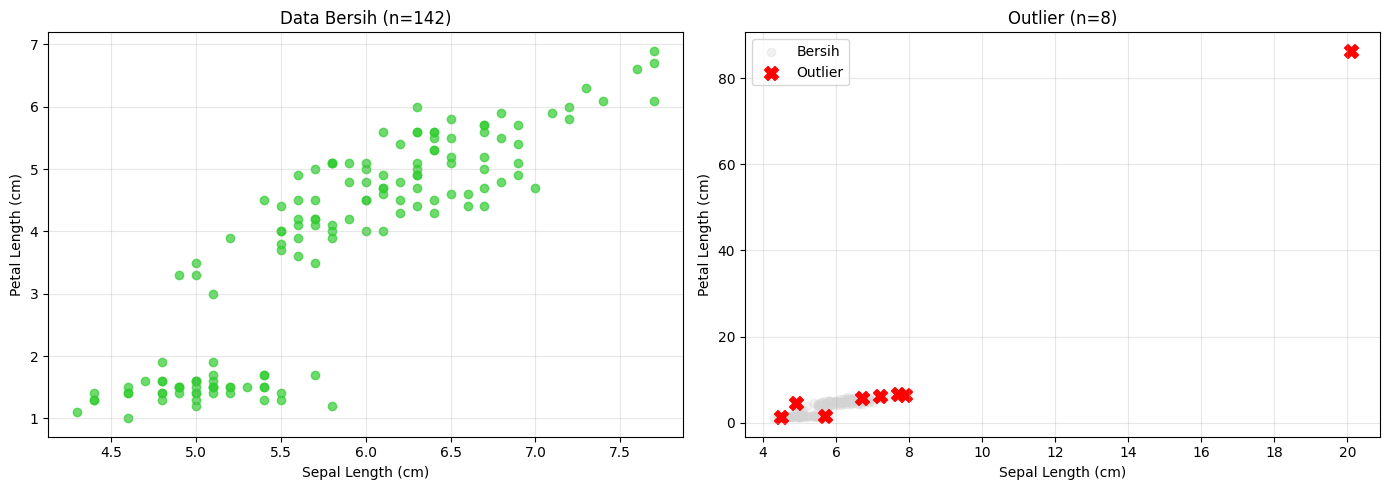

In [32]:
plt.figure(figsize=(14,5))

# Plot Data Bersih
plt.subplot(1,2,1)
plt.scatter(df_clean['sepal length'], df_clean['petal length'], 
            c='limegreen', alpha=0.7, label='Bersih')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Data Bersih (n={})'.format(len(df_clean)))
plt.grid(alpha=0.3)

# Plot Outlier
plt.subplot(1,2,2)
plt.scatter(df_clean['sepal length'], df_clean['petal length'], 
            c='lightgrey', alpha=0.3, label='Bersih')
plt.scatter(outliers['sepal length'], outliers['petal length'], 
            c='red', s=100, marker='X', label='Outlier')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Outlier (n={})'.format(len(outliers)))
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()